# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:

# TODO: Fill this in based on where you saved the training and testing data
import pickle

training_file = "train.p"
testing_file = "test.p"# Load pickled data


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
train_features, train_labels, train_size, train_coords = train['features'], train['labels'], train['sizes'], train['coords']
test_features, test_labels, test_size, test_coords = test['features'], test['labels'], test['sizes'], test['coords']


X_train = train_features
y_train = train_labels
X_test  = test_features
y_test  = test_labels


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np
# TODO: Number of training examples
n_train = len(train_features)

# TODO: Number of testing examples.
n_test = len(test_features)

# TODO: What's the shape of an traffic sign image?
image_shape = train_features[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(train_labels)) # count number of lines in signames.csv

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
# load signs file
def load_signs(file):
    lines = open(file).readlines()[1:]
    lines = [line.strip().split(",") for line in lines]
    signs = dict([ (int(classid), desc) for classid, desc in lines])
    return signs

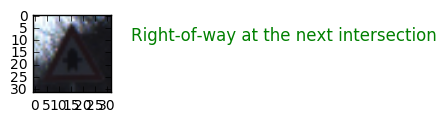

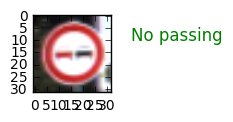

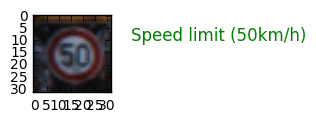

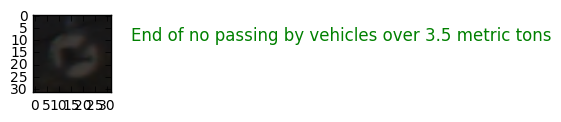

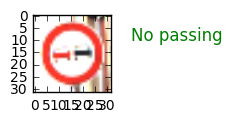

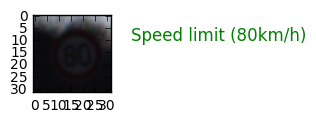

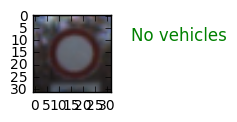

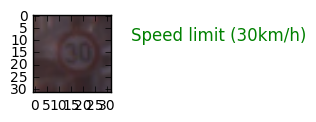

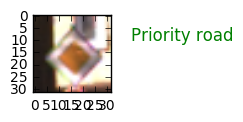

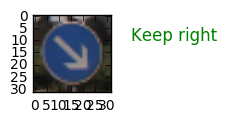

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

signs = load_signs("signnames.csv")
# Get 10 random images 
for i in range(0, 10):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()

    #print(signs.get(y_train[index]))
    
    
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.text(40, 10, signs.get(y_train[index]),fontsize=12, color='green')
    #print(y_train[index])
   

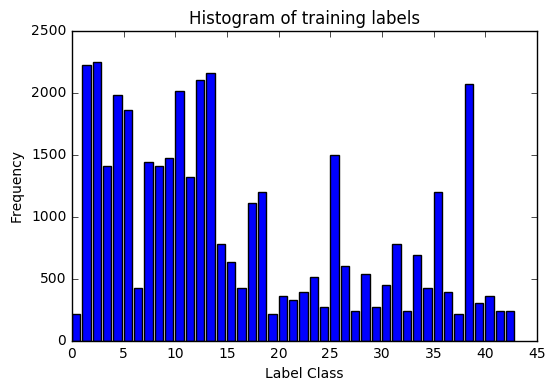

In [5]:
# added for Udacity review #1
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Count of occurences for each label in the training dataset
labels, freq = np.unique(y_train, return_counts=True)
plt.title('Histogram of training labels')
plt.xlabel("Label Class")
plt.ylabel("Frequency")
plt.bar(labels, freq)
plt.show()

In [6]:
#Convert to grayscale, histogram equalize, and expand dims
import  cv2
def grayscale(image):
    
    imgs = np.ndarray((image.shape[0], 32, 32, 1), dtype=np.uint8)
    for i, img in enumerate(image):
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img  = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.equalizeHist(img)
        img = np.expand_dims(img, axis=2)
        imgs[i] = img
    return imgs


In [7]:
# Implement Min-Max scaling for image data
# From Tensor flow lab
def normalize(image_data):
    a = 0.01
    b = 0.99
    color_min = 0.0
    color_max = 255.0
    
    return a + ( ( (image_data - color_min) * (b - a) )/(color_max - color_min))



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
# Split data
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [9]:
print (len(X_train))
print (len(X_validation))


31367
7842


In [10]:
# Normalize images
X_train = normalize(X_train)
X_test = normalize(X_test)
X_validation = normalize(X_validation)

In [11]:
# Shuffling
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [12]:
import tensorflow as tf
EPOCHS = 10
BATCH_SIZE = 128

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I first tried grayscaling the image but the model did not perform well. Accuracy rating was low. Then, I normalized the image and shuffled the data. This seemed to perform better. I will based on comments on forum try to generate additional data by rotating image.

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** Used sklearn train_test_split to split the data into training and validation sets. Split it 80/20. I did not generate additional data but will attempt to do this later. It makes sense to generate additional data perhaps by rotating the images as some have suggested in the forums. Also, the data is obviously skewed from the histogram that I ran previously with some classes of the image having a better representation than others. It is also likely that in the real world these labels occur with more frequency than others but not sure. What this means is that, if I pick random images from the internet, the model may not perform as well.

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

###
This architecture is based on LeNet that I learnt from the class.
The input image is 32x32x3 since I decided not to grayscale after since I pre-processed with grayscale and ran multiple iterations of the model. In the end, I went ahead and normalized the image and kept the RGB scale just like in the original.

I also researched AlexNet, VGG and GoogLeNet but in the end continued to use LeNet. For this exercise, LeNet works fine with an accuracy in the 96% range which is good.



In [13]:
from tensorflow.contrib.layers import flatten

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return x
                      
def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='VALID')

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
        
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
   
    
    F_W = tf.Variable(tf.truncated_normal((5, 5, 3, 6),mean = mu, stddev = sigma)) # (height, width, input_depth, output_depth)
    F_b = tf.Variable(tf.zeros(6)) # (output_depth)
    conv1 = conv2d(x, F_W, F_b)
    
    # Relu activation
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1)
    
    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
       
    F_W = tf.Variable(tf.truncated_normal((5, 5, 6, 16),mean = mu, stddev = sigma)) # (height, width, input_depth, output_depth)
    F_b = tf.Variable(tf.zeros(16)) # (output_depth)
    conv2 = conv2d(conv1, F_W, F_b)
    
    
    # Relu Activation
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2)
    
    #conv2 = tf.nn.dropout(conv2,.25)

    
    #Flatten the image. Input = 5x5x16. Output = 400.
    images_flat = tf.contrib.layers.flatten(conv2)

    
    # Layer 3: Fully Connected. Input = 400. Output = 120.

    F_W = tf.Variable(tf.truncated_normal(shape=(400,120),mean = mu, stddev = sigma)) # (height, width, input_depth, output_depth)
    F_b = tf.Variable(tf.zeros(120)) # (output_depth)
    
    fc1   = tf.matmul(images_flat, F_W) + F_b
    
    #  Relu Activation.
    fc1    = tf.nn.relu(fc1)
    
    #fc1 = tf.nn.dropout(fc1, .5)
    

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    F_W = tf.Variable(tf.truncated_normal(shape=(120,84),mean = mu, stddev = sigma)) # (height, width, input_depth, output_depth)
    F_b = tf.Variable(tf.zeros(84)) # (output_depth)
    
    fc2   = tf.matmul(fc1, F_W) + F_b
    
    # Relu Activation.
    fc2    = tf.nn.relu(fc2)
    
   
    
    #fc2 = tf.nn.dropout(fc2, .5)
   

    # Layer 5: Fully Connected. Input = 84. Output = 43.( Number of classes)
    F_W = tf.Variable(tf.truncated_normal(shape=(84,43),mean = mu, stddev = sigma)) # (height, width, input_depth, output_depth)
    F_b = tf.Variable(tf.zeros(43)) # (output_depth)
    
    logits  = tf.matmul(fc2, F_W) + F_b
    
    
    return logits
                      
   

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
]


**Answer:** I pretty much used the LeNet model from the class and experimented with dropout after the fully connected layer. Adding a dropout of .5 didn't seem to make much of a difference while training. So, I have commented it out.

1. Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
2. Relu Activation
3. Pooling. Input = 28x28x6. Output = 14x14x6.
4. Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
5. Relu Activation
6. Pooling. Input = 10x10x16. Output = 5x5x16.
5. Flatten the image. Input = 5x5x16. Output = 400. 
5. Layer 3: Fully Connected. Input = 400. Output = 120.
6. Relu Activation
7. Layer 4: Fully Connected. Input = 120. Output = 84.
8. Relu Activation
9. Layer 5: Fully Connected. Input = 84. Output = 43.( Number of classes)




In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [15]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
#optimizer  = tf.train.AdadeltaOptimizer(learning_rate = rate)
#optimizer   = tf.train.GradientDescentOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [16]:

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print (num_examples)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    
    
    print("Model saved")

31367
Training...

EPOCH 1 ...
Validation Accuracy = 0.700

EPOCH 2 ...
Validation Accuracy = 0.868

EPOCH 3 ...
Validation Accuracy = 0.926

EPOCH 4 ...
Validation Accuracy = 0.931

EPOCH 5 ...
Validation Accuracy = 0.943

EPOCH 6 ...
Validation Accuracy = 0.959

EPOCH 7 ...
Validation Accuracy = 0.960

EPOCH 8 ...
Validation Accuracy = 0.964

EPOCH 9 ...
Validation Accuracy = 0.969

EPOCH 10 ...
Validation Accuracy = 0.961

Model saved


In [18]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.880


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** 
I used LeNet with the Adam Optimizer.

I trained the model using a Batch Size of 128 and 10 epochs.

Additionally used a learning rate of .001

With this using LeNet and AdamOptimizer I got an accuracy of over 96%. Test accuracy close to 88%. 

I also tried using the AdadeltaOptimizer and got an accuracy of just over 1%.

Using the Gradient Descent Optimizer and a learning rate of .001 , I got an accuracy of just about 9%

I also learnt that the Adam Optimizer is more sophisticated than Gradient Descent. Here's the relevant paper that I read about all the different ways to fine tune  https://arxiv.org/pdf/1206.5533.pdf


Also tried tuning learning rate. Values I tried were .01, .05, .001.

            

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** Pretty much followed the guidelines from the project instructions and used LeNet after doing research on other architectures such as AlexNet, VGG and GoogLeNet. I also browsed the forum to find out what everyone else was doing. Finally landed on LeNet.I think this works well considering that the validation accuracy is in the 90% range. 
1. First trial run without Dropout. Validation Accuracy after 10 epochs= 96%
2. Second trial run with Dropout added after Fully Connected Layers. First dropout (.25). Second Dropout (.5). Validation Accuracy now shows 70.1%
3. Third trial run with Dropout added after 2nd Layer. Also added dropout after the first fully connected layer. First dropout (.25). Second dropout (.5). Validation accuracy is 68.5%

I stuck with not using Dropouts.

Played around with sigmoid activation but the model didn't perform very well. Also, in reading kdnuggets  http://www.kdnuggets.com/2016/03/must-know-tips-deep-learning-part-2.html decided to use ReLu.

Convolutional layer seems best fitted to image processing of this kind. I can see that there are so many different knobs one can use to tune the network. There is less danger in overfitting although the model that I have seems to train well but peform less well on the test date. Additionally when I picked random traffic signs off the web the model is at a loss to predict as you will see at the bottom. Perhaps, one way to mitigate this bias is to increase the data size and to regularize the images. One technique I read is to use L2 regularization. I intend to explore this later.



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [34]:
def run_test(data):
    keep_prob = tf.placeholder(tf.float32)
  

    predictions = tf.argmax(logits,1)

    with tf.Session() as sess:
        
        loader = tf.train.import_meta_graph('lenet.meta')
        loader.restore(sess, tf.train.latest_checkpoint('./'))
        
        feed_dict = {x: data, keep_prob:1.0}
        sess = tf.get_default_session()
        classification = sess.run(predictions,feed_dict)  
        #output = sess.run(tf.nn.top_k(label_pred, k=5), feed_dict)
     

     # Calculate accuracy
    match_count = sum([int(y == y_) 
                   for y, y_ in zip(sample_labels, classification)])
    accuracy = match_count / len(sample_labels)
    print("Accuracy: {:.3f}".format(accuracy))
    print("Actual Labels:", sample_labels)
    print("Predicted Labels:",classification)


In [61]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
def get_topk(data):

    keep_prob = tf.placeholder(tf.float32)
    label_pred = tf.nn.softmax(logits)

    with tf.Session() as sess:
        #output = sess.run(tf.nn.top_k(label_pred, k=5), feed_dict)
        loader = tf.train.import_meta_graph('lenet.meta')
        loader.restore(sess, tf.train.latest_checkpoint('./'))
        
        feed_dict = {x: data, keep_prob:1.0}
        sess = tf.get_default_session()
        output = sess.run(tf.nn.top_k(label_pred, k=5), feed_dict)
   
        return output
    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



12630


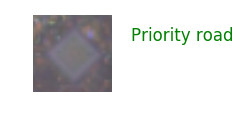

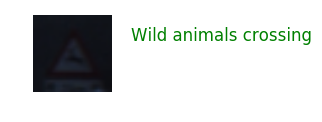

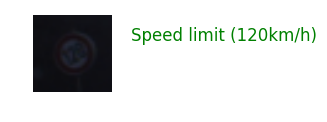

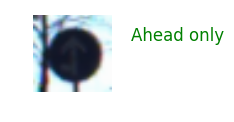

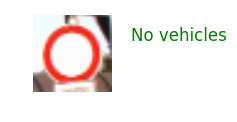

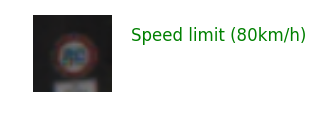

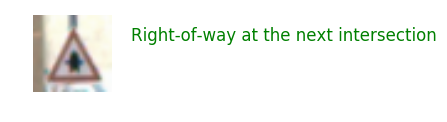

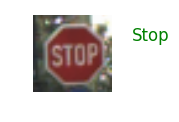

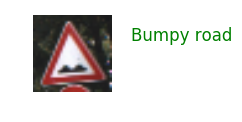

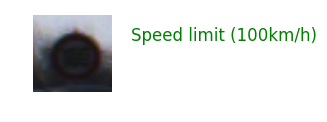

In [68]:
# Pick 10 random images from the test which are already pre-processed

print (len(X_test))

sample_indexes = random.sample(range(len(X_test)), 10)


sample_test = [X_test[i] for i in sample_indexes]
sample_labels = [y_test[i] for i in sample_indexes]

for i in range(0,len(sample_test)):
    plt.figure(figsize=(1,1))
    plt.axis('off')
    plt.imshow(sample_test[i])
    plt.text(40, 10, signs.get(sample_labels[i]),fontsize=12, color='green')


In [69]:
# Run test with 10 sample images from the test data
run_test(sample_test)

Accuracy: 0.800
Actual Labels: [12, 31, 8, 35, 15, 5, 11, 14, 22, 7]
Predicted Labels: [40 31  8 35 15  5 11 14 22  3]


In [ ]:
###With this sample I got 80% accuracy.

In [72]:
# Check probabilities of the 80 mph sign
output = get_topk(sample_test)
print (output)
print (output[0][5])

TopKV2(values=array([[  6.80521846e-01,   1.22867681e-01,   7.96219185e-02,
          5.13630919e-02,   3.05705499e-02],
       [  8.52008820e-01,   7.85476938e-02,   2.30308250e-02,
          1.99628454e-02,   1.64454915e-02],
       [  7.24452734e-01,   7.90274516e-02,   7.80218989e-02,
          4.41870317e-02,   1.71234179e-02],
       [  6.58845842e-01,   3.37905705e-01,   1.65188883e-03,
          1.00654305e-03,   3.60408652e-04],
       [  1.00000000e+00,   7.55421975e-11,   1.65583671e-12,
          1.06606709e-15,   4.56158053e-16],
       [  9.96671915e-01,   2.76108272e-03,   2.78196443e-04,
          1.96805559e-04,   8.20082205e-05],
       [  1.00000000e+00,   9.79140324e-09,   7.63813665e-11,
          4.74876811e-13,   1.52749449e-13],
       [  9.99999285e-01,   6.92556284e-07,   2.41366056e-08,
          1.89617406e-08,   1.78660797e-09],
       [  1.00000000e+00,   2.23170105e-09,   1.78241330e-12,
          5.05483242e-14,   4.44433004e-14],
       [  5.32911718e-0

(-0.1, 1.1)

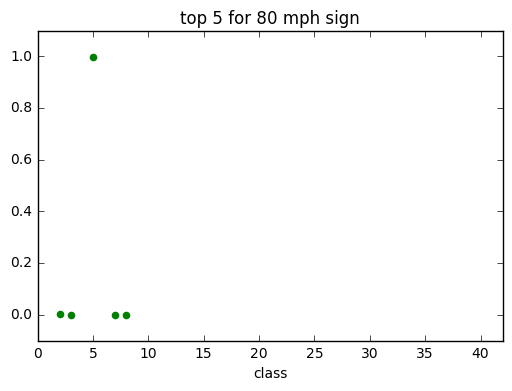

In [76]:
import matplotlib.pyplot as plt

vals = output.values
inds = output.indices

y0 = vals[5,:]
x0 = inds[5,:]
plt.scatter(x0,y0,color="green")
plt.title('top 5 for 80 mph sign')
plt.xlabel('class')
plt.xlim([0,42])
plt.ylim([-0.1,1.1])

(-0.1, 1.1)

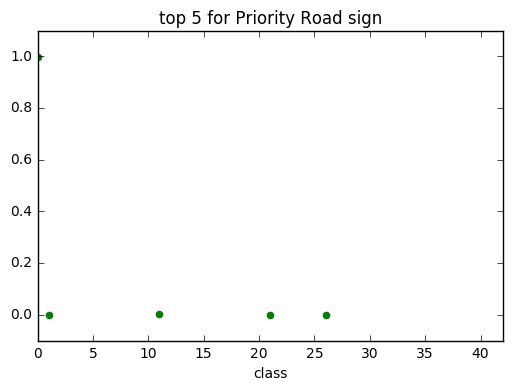

In [86]:
import matplotlib.pyplot as plt

vals = output.values
inds = output.indices

y0 = vals[0,:]
x0 = inds[0,:]
plt.scatter(x0,y0,color="green")
plt.title('top 5 for Priority Road sign')
plt.xlabel('class')
plt.xlim([0,42])
plt.ylim([-0.1,1.1])

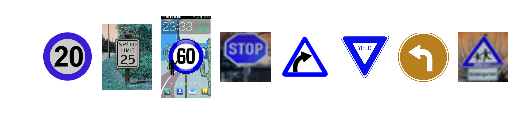

In [87]:
## Images I captured from the web
### Load the images and plot them
import cv2
import skimage.transform
import skimage.data

# Downloaded 8 images and converted them to 32x32 online
sample_images = ['20_1.png', '25mph.jpeg', '60mph.jpeg', 'Stop2.png', 
           'TurnRight2.png', 'yield2.png', 'TurnLeft.png', 'Children.png']
    # Output label should be 0, 29, ??, 14, 33, 13, 14, 28
    

sample_labels = [0,-1,3,14,33,13,34,28]
sample_test = []

for image in sample_images:
    img = cv2.imread('images/' + image, 1)
    sample_test.append(img)
    plt.subplot(1, 8, len(sample_test))
    plt.imshow(img, cmap="gray")
    plt.axis('off')

In [88]:
for image in sample_test:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))


shape: (200, 200, 3), min: 0, max: 255
shape: (259, 195, 3), min: 0, max: 248
shape: (290, 174, 3), min: 0, max: 255
shape: (32, 32, 3), min: 0, max: 223
shape: (152, 152, 3), min: 0, max: 255
shape: (207, 243, 3), min: 0, max: 255
shape: (224, 225, 3), min: 0, max: 255
shape: (32, 32, 3), min: 0, max: 219


In [89]:
import skimage.transform
import skimage.data
images32 = [skimage.transform.resize(image, (32, 32)) for image in sample_test] 


In [90]:
# Checking after resize
for image in images32:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))



shape: (32, 32, 3), min: 0.0, max: 1.0
shape: (32, 32, 3), min: 0.002526616115195881, max: 0.9404277726715686
shape: (32, 32, 3), min: 0.0, max: 1.0
shape: (32, 32, 3), min: 1.7659076815214265e-15, max: 0.8745098039215685
shape: (32, 32, 3), min: 0.0, max: 1.0
shape: (32, 32, 3), min: 0.0, max: 1.0
shape: (32, 32, 3), min: 1.2034491050752984e-15, max: 1.0
shape: (32, 32, 3), min: 0.0, max: 0.8588235294117629


### Looks like the reshape also normalized the images which saves me the trouble of pre-processing them

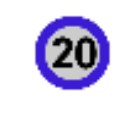

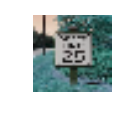

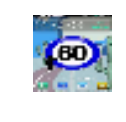

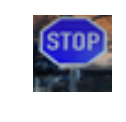

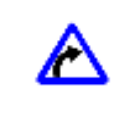

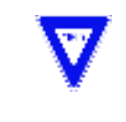

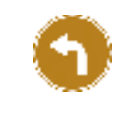

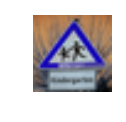

In [91]:
sample_test=[]
for image in images32:
    sample_test.append(image)
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    
    plt.axis('off')

In [82]:
run_test(sample_test)

Accuracy: 0.250
Actual Labels: [0, -1, 3, 14, 33, 13, 34, 28]
Predicted Labels: [ 0 17 12 40 12 13 32 36]


**Answer:** Accuracy on the image I captured is about 25.  The model recognized only 2 of  the 8 images. I attribute this to poor quality of the picture. Accuracy on the test images is about 80%. I particulary wanted to check how the model would perform on the first image I picked from the test set which is the Priority Road sign. It is so faint and predictably enough the model didn't recognize it.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** It is doing a poor job of predicting images that I captured. I got an accuracy of just 25% which is pathetic compared to the sample from the test data. The test data accuracy was close to 90%. It is likely that having better quality images would improve the prediction. Also clearly the model is overfit and can do better with regularization

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**  In the 6th element in the array, it did a great job of predicting the yield sign. Now, I think it maybe because the yield sign is of a specific shape and the model recognized that. The image is very faint. On the other hand, the last image of children crossing the model thought it was a go straight or right. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [92]:
# Check probabilities of the yield sign
output = get_topk(sample_test)
print (output)
print (output[0][5])

TopKV2(values=array([[  9.96532679e-01,   2.87919771e-03,   5.88048191e-04,
          2.81340728e-09,   2.96658226e-10],
       [  9.99646544e-01,   2.71147554e-04,   7.14040434e-05,
          4.73456475e-06,   3.08511494e-06],
       [  1.00000000e+00,   1.50106505e-09,   1.20431609e-10,
          3.28854912e-12,   1.74461994e-13],
       [  4.92284119e-01,   4.83212501e-01,   2.43564937e-02,
          1.09225701e-04,   3.17592494e-05],
       [  9.99901414e-01,   9.85870502e-05,   2.13654051e-12,
          6.52833365e-13,   6.26252751e-15],
       [  1.00000000e+00,   2.37290188e-21,   6.73050208e-24,
          4.00502298e-32,   4.50875846e-33],
       [  5.35878539e-01,   4.57300216e-01,   4.05581575e-03,
          2.75847386e-03,   4.48485707e-06],
       [  9.99864459e-01,   9.96452654e-05,   2.52810114e-05,
          1.04983073e-05,   1.13897748e-07]], dtype=float32), indices=array([[ 0, 11, 26,  1, 21],
       [17, 13, 26, 18, 34],
       [12, 11, 10,  6, 35],
       [40, 38,  9

(-0.1, 1.1)

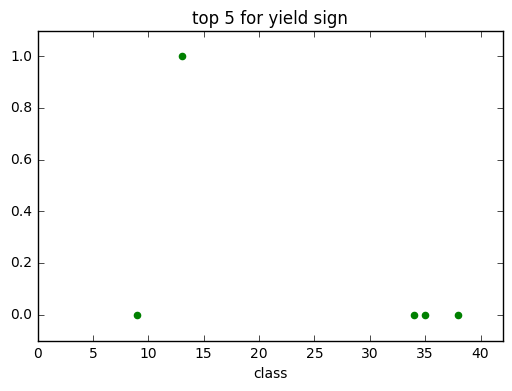

In [85]:
import matplotlib.pyplot as plt

vals = output.values
inds = output.indices

y0 = vals[5,:]
x0 = inds[5,:]
plt.scatter(x0,y0,color="green")
plt.title('top 5 for yield sign')
plt.xlabel('class')
plt.xlim([0,42])
plt.ylim([-0.1,1.1])

(-0.1, 1.1)

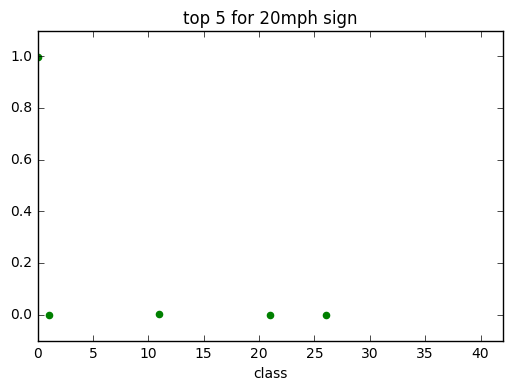

In [93]:
import matplotlib.pyplot as plt

vals = output.values
inds = output.indices

y0 = vals[0,:]
x0 = inds[0,:]
plt.scatter(x0,y0,color="green")
plt.title('top 5 for 20mph sign')
plt.xlabel('class')
plt.xlim([0,42])
plt.ylim([-0.1,1.1])

In [ ]:
### It did a great job of predicting the 20mph sign